In [1]:
!pip install sktime
!pip install skforecast
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [2]:
import warnings ; warnings.warn = lambda *args,**kwargs: None

In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120}) # set figure sizes
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')

<a name="contents"></a>
## Contents

<br>1. [Import and check time series quality](#section_1)
<br>2. [EDA of the time series](#section_2)
<br>3. [Identify the trend](#section_3)
<br>4. [Remove trend then identify seasonality](#section_4)
<br>5. [Automatic time series de-composition](#section_5)
<br>6. [Build the model](#section_6)

# Time Series Forecasting

Time series forecasting is a technique that utilises historical and current data to predict future values over a period of time or a specific point in the future. It involves building models through historical analysis and using them to make observations and drive future strategic decision-making.

Time series forecasting is helpful for businesses because it can guide their strategy and help them understand future trends. It can also help businesses optimise their operations, such as supply chain management, production and inventory planning, finance and budgeting, marketing and sales, and customer behaviour.

By using time series forecasting, businesses can anticipate future demand, reduce costs, improve efficiency, and increase customer satisfaction. Here are some examples of time series forecasting in action within different businesses:

- **Retail:** Time series forecasting can help retailers predict customer demand for different products across seasons, regions, and segments, and adjust their inventory, procurement, and pricing accordingly. For example, to optimise its supply chain and replenishment processes.
- **Finance:** Time series forecasting can help financial institutions and investors predict the closing price of a stock, the exchange rate of a currency, the interest rate of a bond, or the volatility of a market. For example, to provide insights and recommendations to its clients.
- **Healthcare:** Time series forecasting can help healthcare providers and researchers forecast the spread of a pandemic, the diagnosis of a disease, the medication planning for a patient, or the availability of hospital resources. For example, to monitor and project COVID-19 cases and deaths.
- **Manufacturing:** Time series forecasting can help manufacturers predict the demand for their products, the quality of their production, the maintenance of their equipment, or the occurrence of anomalies and failures. For example, to optimise wind turbine performance and maintenance.
- **Cybersecurity:** Time series forecasting can help cybersecurity professionals detect and prevent fraud, malware, phishing, denial-of-service attacks, or data breaches by analysing the patterns and trends of network traffic, user behavior, or system logs. For example, to identify and block fraudulent transactions.

E.T.L

RMSE and Others:

1. residuals = **y_model - y_data**

2. RSS = **np.sum( np.square(residuals) )**

3. mean_squared_residuals = **np.sum(np.square(residuals) ) / len(residuals)**

4. MSE = **np.mean( np.square(residuals) )**

5. RMSE = **np.sqrt(np.mean(np.square(residuals)))**

5. RMSE = **np.std(residuals)**

6. MAPE = **np.mean(np.abs(forecast - actual)/np.abs(actual))**

**RMSE is referred to as a metric of goodness-of-fit, which measures by how much predictions deviate from the data.**




In [4]:
# Define the function to return the MAPE values
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

# Time Series Example

The following code is an example of time series forecasting in Python.   You will be using time series analysis in future modules, so you are required to learn this in great depth; however work through the example as it still is an example of a linear model used for prediction.

This example uses a well-known times series dataset - Diabetic Drug Sales in Australia - as it contains several elements typical of time series data such as trend, seasonality and randomness.  

<a name="section_1"></a>
## 1. Import and check time series data quality

[Return to contents](#contents)

In [5]:
# Import Data as Dataframe

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 index_col='date',parse_dates=['date'])
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [61]:
df.to_csv('diabetic_au.csv', index=True)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


<a name="section_2"></a>
## 2. Exploratory Data Analysis (EDA) of the TimeSeries

[Return to contents](#contents)

Let's now use `pandas` to carry out an Exploratory Data Analysis (EDA) of our time series data.

Our first plot simply shows the entire time series in a single plot.

> 🔑 *For time series data, the obvious graph to start with is a time plot. That is, the observations are plotted against the time of observation, with consecutive observations joined by straight lines. https://otexts.com/fpp3/time-plots.html*

In [6]:
# Explore our data set

df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


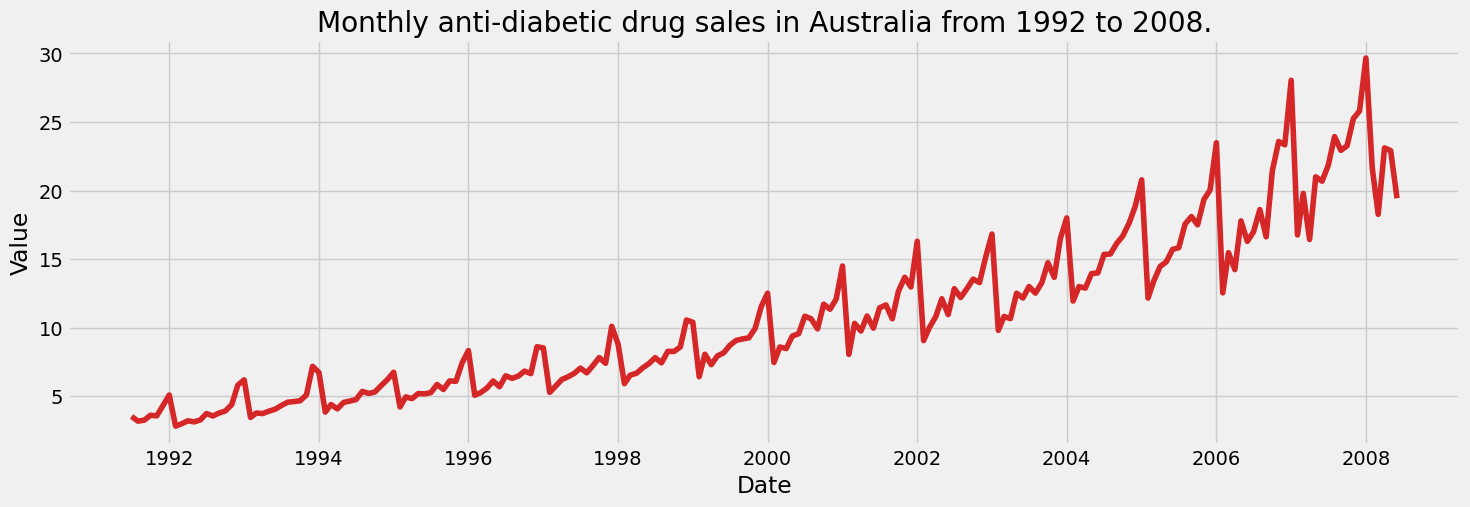

In [7]:
# Visualise the data

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    """
    Good documentation
    """
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

<a name="section_3"></a>
## 3. Identify the trend

[Return to contents](#contents)


The seasonality in the data is very clear - a sharp fall in drug sales every February, rising again in March, falling again in April etc. This pattern repeats every year - so if we were planning resource allocation we would need to take this into account.

Notice there is also a trend in the data - drug sales are increasing from one year to the next.

One visualisation technique is the use of the [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) - which capture the level of the data as well as the distribution of the data for each period (each year in this case).

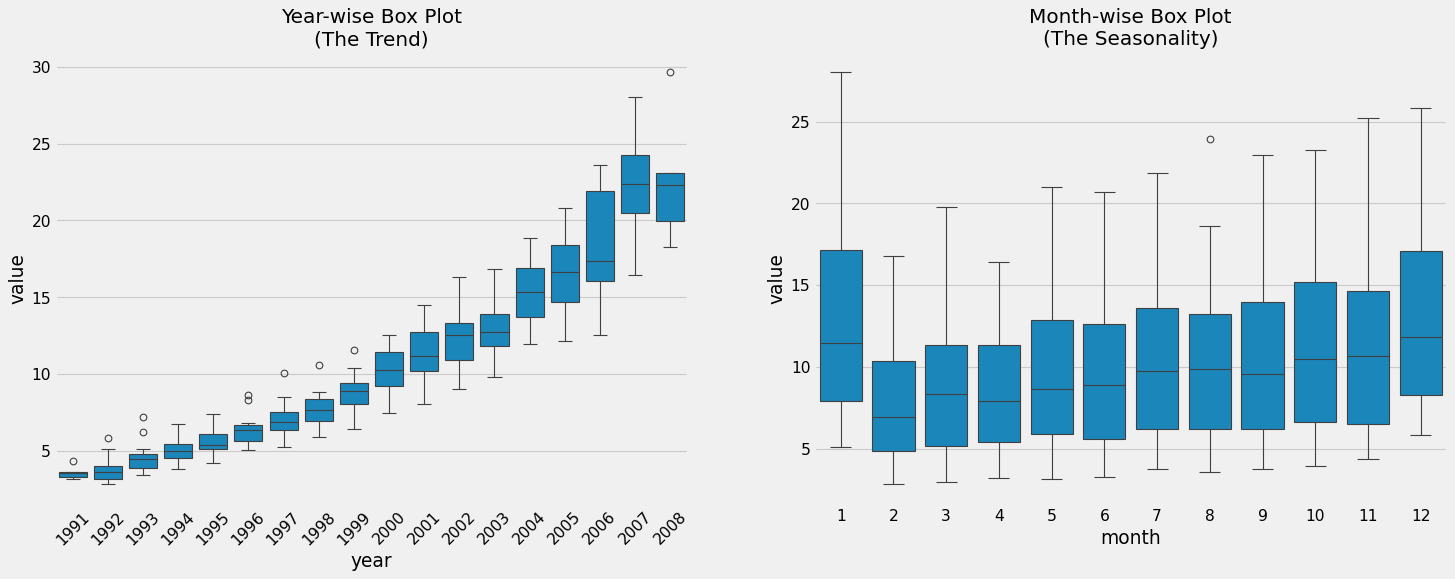

In [8]:
# Extract the year and month from the index

df['year'] = df.index.year
df['month'] = df.index.month
years = df['year'].unique()

# Create the plot

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Rotate the x-axis tick labels for better readability
axes[0].tick_params(axis='x', labelrotation=45)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

The boxplots clearly show the annual and monthly distributions of the data. We can see that December and January have higher drug sales.



A time series is split into:
* Base Level
* Trend
* Seasonality
* Error (which random and we can't predict)

A trend is observed when there is an increasing or decreasing slope in the time series.

Seasonality is a distinct repeating pattern between regular intervals.

Not all time series must have trend and/or seasonality.

The visuals below illustrate the compositional nature of time series...



<a name="section_4"></a>
## 4. Identify other characteristics like seasonality, cyclicality or randomness

[Return to contents](#contents)


There are many levels of seasonality that can appear in your data:
- time of day
- day of week
- week of month/year
- month of year
- month of quarter
- quarter of year

The most common is monthly and there are lots of examples of data that will display this type of seasonality, including:
- retail (often sees a spike in December)
- travel (often sees a spike during summer)
- finance (often sees differences within or by quarter)

Once we have identified a predictable and meaningful seasonality in the data, we can predict how that seasonality will continue into our forecasts.


> 🔑 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

When we take away the shifted data to remove the seasonality, this is known as *seasonal differencing*

> 🔑 https://otexts.com/fpp3/stationarity.html#seasonal-differencing

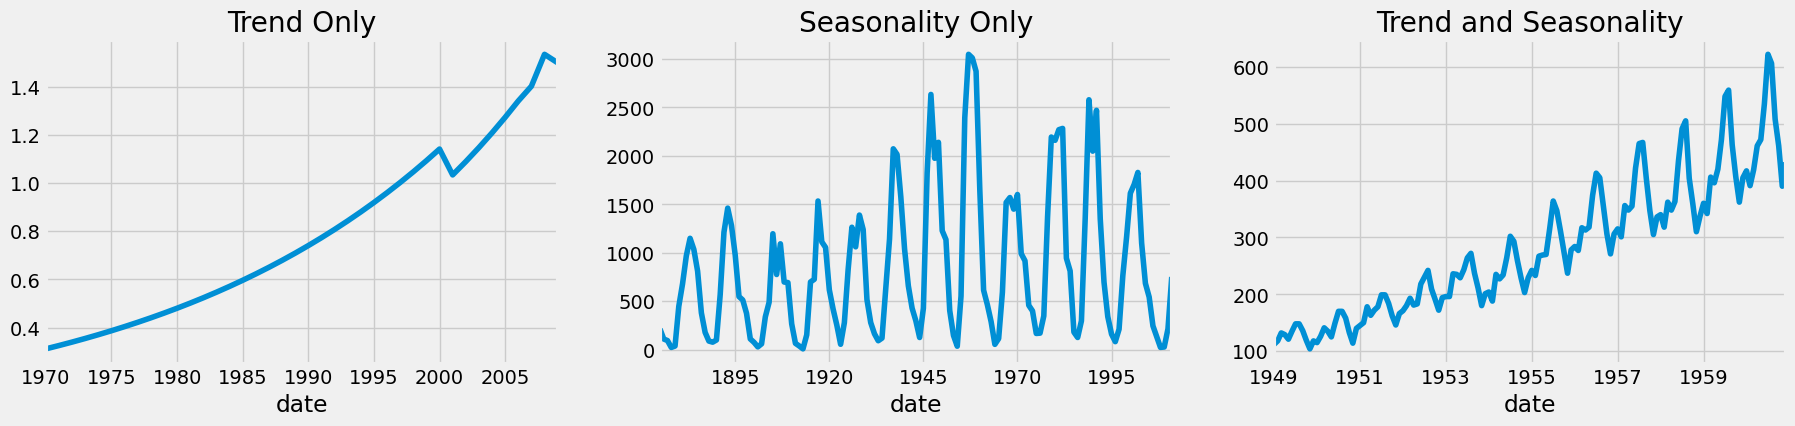

In [9]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2]);

A time series may also be cyclic.

The data shows a repetitive pattern but in regular, fixed intervals.

'Cyclic’ effects, such as economic growth, are not ‘seasonal’, such as ice cream sales in summer.  

As part of your exploratory data analysis it is a good idea to 'decompose' your times series into trend, seasonal and residual (error) components.

We do this by working out the trend - in annual data this is usually the 12-month moving average - and subtracting that from the data values.

This leaves the seasonal and residual components - we then calculate the seasonal component (too complex for this notebook) and remove that to leave the remaining unexplained element of the data - the error / residual.

> 🔑 *The classical method of time series decomposition originated in the 1920s and was widely used until the 1950s. It still forms the basis of many time series decomposition methods, so it is important to understand how it works. The first step in a classical decomposition is to use a moving average method to estimate the trend...https://otexts.com/fpp3/moving-averages.html*

<a name="section_5"></a>
## 5. Automatic Time Series de-composition

[Return to contents](#contents)

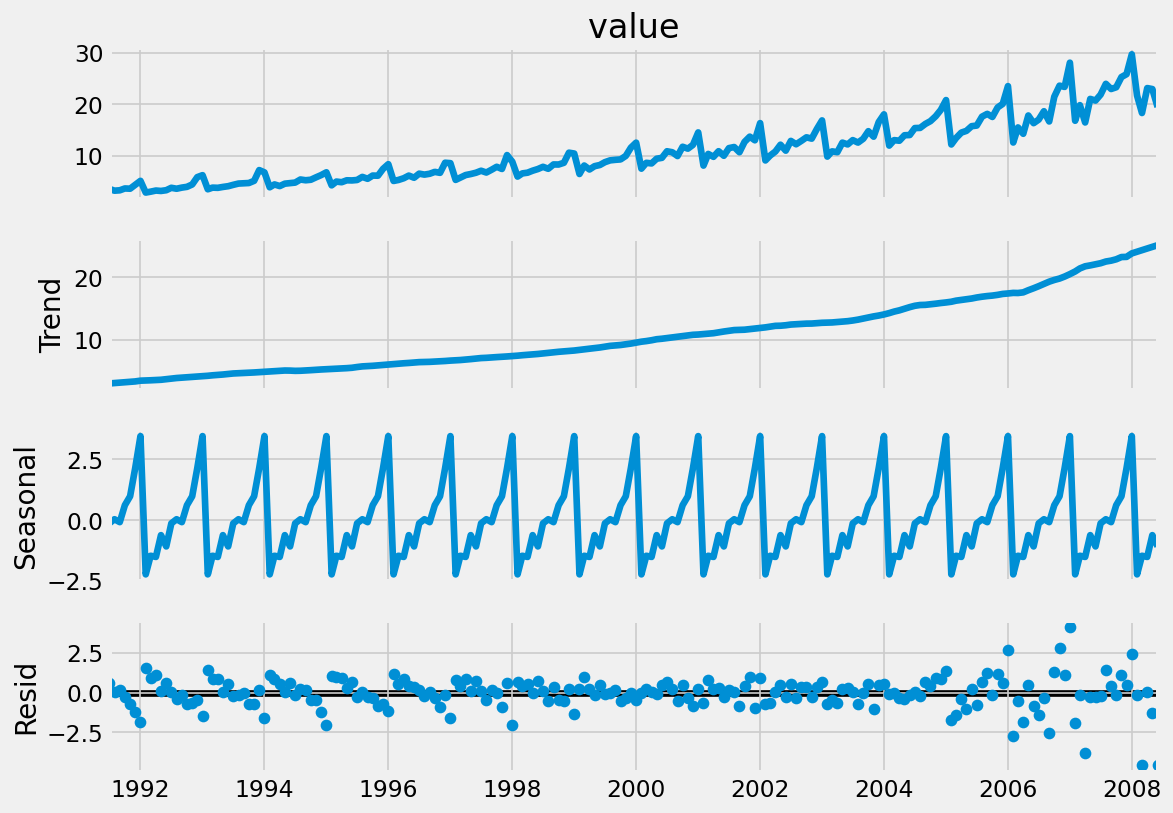

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
result_add.plot()
plt.show()

In [11]:
# reconstruct the components
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,-0.140765,3.060085,0.607271,3.526591
1991-08-01,0.027747,3.124765,0.028379,3.180891
1991-09-01,-0.090361,3.189445,0.153137,3.252221
1991-10-01,0.602876,3.254125,-0.245998,3.611003
1991-11-01,0.970698,3.318805,-0.723634,3.565869


If we add up the trend + seasonality + residual = actual observed value

Stationarity is an import property of a time series.

A stationary series mean the values of the series is not a function of time - that means they do not increase or decrease in time.

In order to model any data we need to know basic statistical properties of the data - the mean and variance - and these must be stable.  If they increase or decrease through time, we can't make meaningful inferences about the data (we can but it is a lot more complicated).

The correlation of a series with its previous values - autocorrelation - must also remain constant over time.

To make a time series stationary we need to transform it into a series with a constant mean, constant variance, no seasonality or trend.  We can then model it and make predictions before transforming it back to give us a meaningful prediction.

In the chart below we can see a time series that is NOT stationary - there is an obvious upwards trend, and the variance is getting wider through the passage of time.  There is also obvious seasonality in the data.


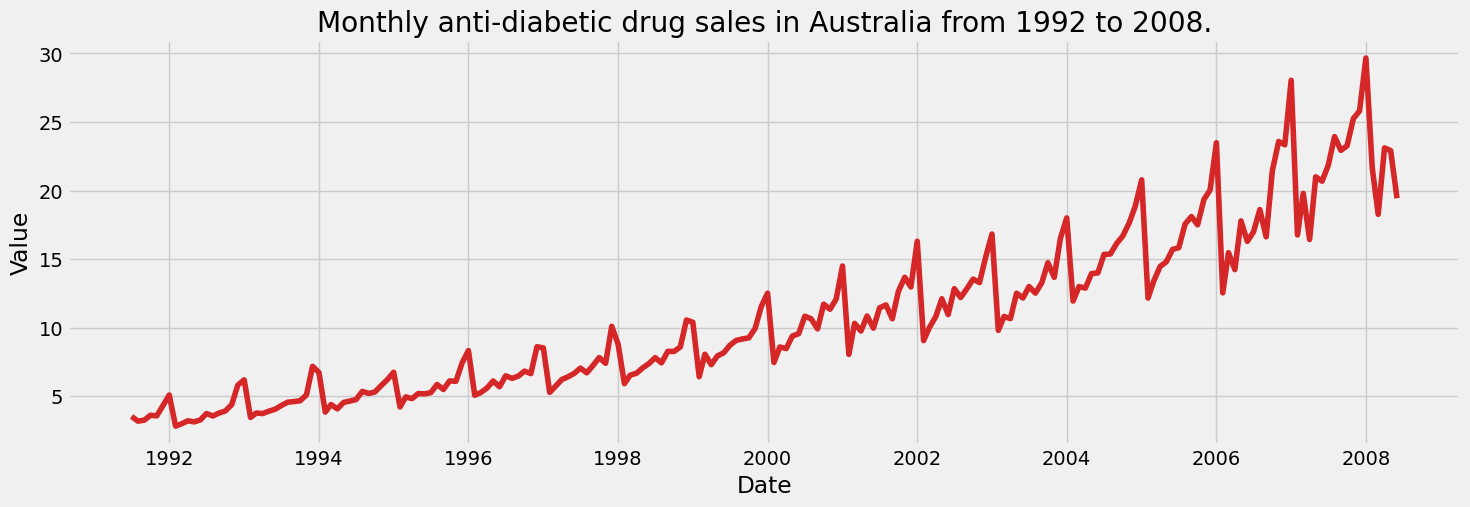

In [12]:
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1991 to 2008.')

**DATA**

Monthly anti-diabetic drug subsidy in Australia from 1992 to 2008.
Description.

Monthly government expenditure (millions of dollars) as part of the Pharmaceutical Benefit Scheme for products falling under ATC code A10 as recorded by the Australian Health Insurance Commission. July 1991 - June 2008.

**Format**

Monthly time series of class ts.

**Source**

Medicare Australia

We can transform this series into a stationary series by differencing the data - that means simply subtracting the previous value from the current value - so we are just left with the difference.  

Forecasting a stationary series is more reliable - remember autoregressive forecasting models are linear regression models of themselves.  

Linear regression works best if the predictors (X variables) are not correlated against each other. A stationary series removes the autocorrelation between the inputs (features in ML) and transforms them into independent inputs.


An example of a time series forecast model




# Time Series Analysis

<a name="section_6"></a>
## 6. Build the model

[Return to contents](#contents)

In [13]:
import pandas as pd
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [14]:
df.head()

,value,year,month
date,,,
1991-07-01,3.526591,1991,7
1991-08-01,3.180891,1991,8
1991-09-01,3.252221,1991,9
1991-10-01,3.611003,1991,10
1991-11-01,3.565869,1991,11


In [15]:
# Verify that a temporary index is complete
# ==============================================================================
freq = 'MS'

# Step 1: Generate a complete date range with the specified frequency
complete_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=freq)

# Step 3: Check for completeness
# Convert both the DataFrame index and the complete_range to sets and check if they are equal
is_complete = set(df.index) == set(complete_range)

print(f"Is the temporal index complete? {is_complete}")

Is the temporal index complete? True


In [16]:
# Data preparation
# ==============================================================================
data = df.rename(columns={'value': 'sales'})
data['date'] = pd.to_datetime(data.index, format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('MS')
data = data.sort_index()
data.head()

,sales,year,month
date,,,
1991-07-01,3.526591,1991,7
1991-08-01,3.180891,1991,8
1991-09-01,3.252221,1991,9
1991-10-01,3.611003,1991,10
1991-11-01,3.565869,1991,11


In [17]:
# check index
data.index.freq

<MonthBegin>

In [18]:
# check missing data
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


Train dates : 1991-07-01 00:00:00 --- 2005-06-01 00:00:00  (n=168)
Test dates  : 2005-07-01 00:00:00 --- 2008-06-01 00:00:00  (n=36)


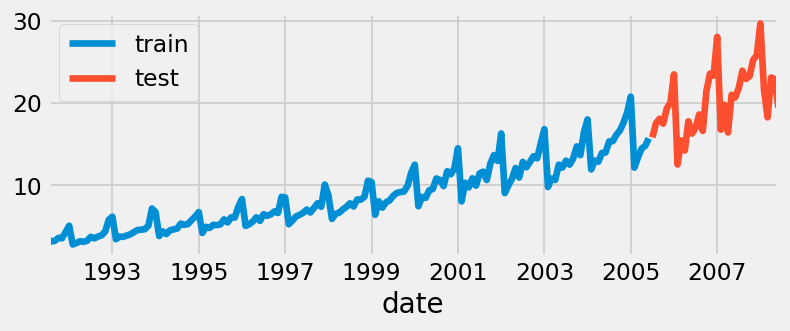

In [19]:
# Split data into train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(7, 2.5))
data_train['sales'].plot(ax=ax, label='train')
data_test['sales'].plot(ax=ax, label='test')
ax.legend();

In [20]:
# Accuracy metrics - function to calculate all metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})


### Statistical Model - SARIMAX

The seasonal ARIMA model incorporates both non-seasonal and seasonal factors in a multiplicative model. One shorthand notation for the model is:  **ARIMA(p,d,q)×(P,D,Q)S**  with with  **p  = non-seasonal AR order**,  **d  = non-seasonal differencing**,  **q  = non-seasonal MA order**,  **P  = seasonal AR order**,  **D  = seasonal differencing**,  **Q  = seasonal MA order**, and  **S  = time** span of repeating seasonal pattern.

The easiest way to find the optimal parameters is to conduct a hyperparameter search, essentially an experimental approach which tests every possible parameter value against a pre-defined benchmark.


In [21]:
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from pmdarima import ARIMA
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax

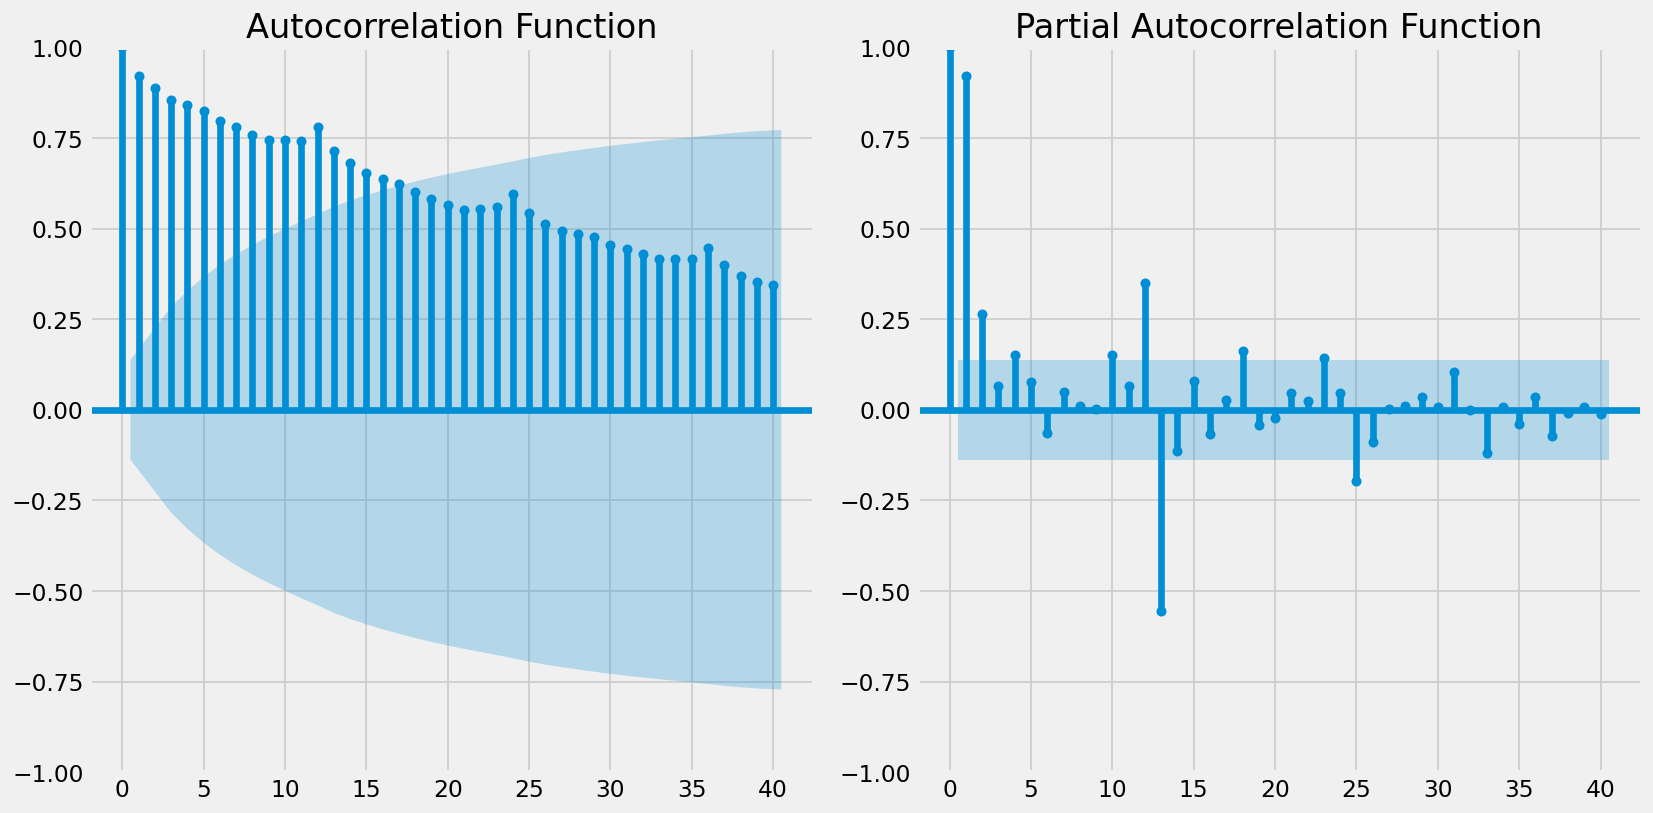

In [31]:
# Manual inspection of parameters
# ======================================================================================
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(data['sales'], ax=plt.gca(), lags=30, title='Autocorrelation Function')

# Plotting the Partial Autocorrelation Function (PACF)
plt.subplot(122)
plot_pacf(data['sales'], ax=plt.gca(), lags=40, title='Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [50]:
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import grid_search_sarimax

# data_train is your prepared training dataset
end_val = data.index.max()

# Initialise the forecaster with a basic SARIMAX configuration
forecaster = ForecasterSarimax(
                 regressor=ARIMA(order=(2, 1, 1), seasonal_order=(0, 0, 0, 0), maxiter=200),
             )

# Now you are ready to perform hyperparameter tuning with grid_search_sarimax function
param_grid = {
    'order': [(p, d, q) for p in range(3) for d in range(2) for q in range(3)],
    'seasonal_order': [(P, D, Q, 12) for P in range(2) for D in range(2) for Q in range(2)],
    'trend': ['n', 'c', 't', 'ct']
}

# Conduct the grid search
results_grid = grid_search_sarimax(
    forecaster            = forecaster,
    y                     = data_train['sales'],
    param_grid            = param_grid,
    steps                 = 12,
    metric                = 'mean_absolute_error',
    initial_train_size    = int(len(data_train)*0.7),
    fixed_train_size      = True,
    return_best           = True,
    verbose               = False,
    suppress_warnings_fit = True,
    show_progress         = True
)

# Print the success message
print("You have successfully run a hyperparameter grid search!")

Number of models compared: 576.


params grid:   0%|          | 0/576 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found parameters, and the whole data set: 
  Parameters: {'order': (2, 1, 1), 'seasonal_order': (1, 1, 1, 12), 'trend': 'ct'}
  Backtesting metric: 0.6082366066746961

You have successfully run a hyperparameter grid search!


In [51]:
# check results grid
results_grid.head(5)

,params,mean_absolute_error,order,seasonal_order,trend
543,"{'order': (2, 1, 1), 'seasonal_order': (1, 1, ...",0.608237,"(2, 1, 1)","(1, 1, 1, 12)",ct
494,"{'order': (2, 1, 0), 'seasonal_order': (0, 1, ...",0.608765,"(2, 1, 0)","(0, 1, 1, 12)",t
495,"{'order': (2, 1, 0), 'seasonal_order': (0, 1, ...",0.609542,"(2, 1, 0)","(0, 1, 1, 12)",ct
510,"{'order': (2, 1, 0), 'seasonal_order': (1, 1, ...",0.610340,"(2, 1, 0)","(1, 1, 1, 12)",t
493,"{'order': (2, 1, 0), 'seasonal_order': (0, 1, ...",0.612788,"(2, 1, 0)","(0, 1, 1, 12)",c


In [54]:
# ==============================================================================
best_order = (2, 1, 1)
best_seasonal_order = (1, 1, 1, 12)
best_trend = 'ct'
# Create a new ForecasterSarimax instance with the best parameters or refit the existing one
forecaster = ForecasterSarimax(
                 regressor=ARIMA(order=best_order, seasonal_order=best_seasonal_order, trend=best_trend,
                                 maxiter=200),
             )

forecaster.fit(y=data_train['sales'], suppress_warnings=True)

In [55]:
# In-sample Predictions
# ==============================================================================
y_fit = forecaster.regressor.arima_res_.fittedvalues

In [56]:
# Out-sample Predictions
# ==============================================================================
y_pred = forecaster.predict(steps=steps)

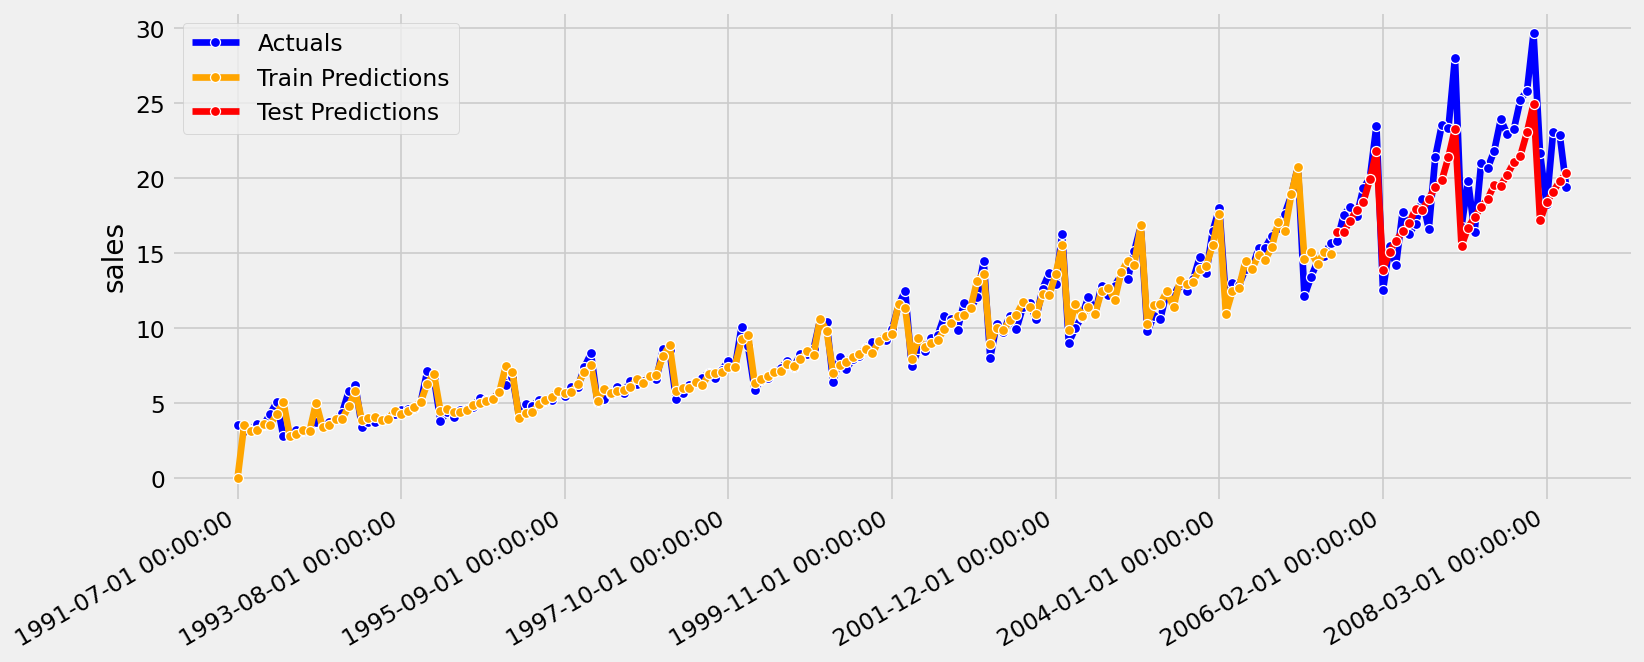

In [57]:
# visualise results
fig, ax = plt.subplots(figsize=(14, 6))
plot_series(data['sales'], y_fit, y_pred, labels=['Actuals', 'Train Predictions', 'Test Predictions'],
            colors=['Blue', 'Orange', 'Red'], ax=ax)

# Rotate the x-axis tick labels for better readability
fig.autofmt_xdate()


plt.show()

In [58]:
# Final model result
forecast_accuracy(y_pred, data_test.sales)

{'mape': 0.09429847183931991,
 'me': -1.4839533431838197,
 'mae': 2.0247875974824954,
 'mpe': -0.05982008390983294,
 'rmse': 2.4386198492795628,
 'corr': 0.9073693349650889,
 'minmax': 0.09298383591065451}

In [59]:
# what is the average of monthly sales?
data['sales'].mean()

10.694429582156861

In [60]:
# a more interpretable measure of error

mape(data_test.sales, y_pred)

9.429847183931992

We are on average, **+-9%** off from the true values, which means we have an accuracy of over 90%! Pretty good result for time series modelling!